In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()

In [3]:
x_train.shape, x_test.shape

((8982,), (2246,))

In [4]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18], dtype=int64))

- 로이터 뉴스 카테고리 분류 데이터
    - 총 11258개의 뉴스 기사 데이터
    - 46개의 카테고리 분류
    - 예)
        - 중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다 -> 날씨
        - 올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다. -> 주식

In [5]:
word_index = reuters.get_word_index()

In [6]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [8]:
idx2word = {0: "<PAD>", 1 : "<S>", 2 : "<UNK>"} # 1:시작, 2:단어장에 없는 데이터

In [9]:
idx2word.update({value + 3 : key for key, value in word_index.items()})
# idx2word와 겹치지 않도록 +3 한 것

In [10]:
" ".join(map(lambda x: idx2word[x], x_train[0]))

'<S> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 텍스트 분류

In [11]:
# 전체 단어 수
len(word_index.keys())

30979

In [12]:
# num_words : 단어 빈도가 많은 순서로 num_words 만큼 보존
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [13]:
# 기사의 길이 출력
len(x_train[0]), len(x_train[1])

(87, 56)

In [14]:
type(x_train[0])

list

In [15]:
for i in range(10):
    print(f"{i}번째 기사")
    print(" ".join(map(lambda x: idx2word[x], x_train[i])))

0번째 기사
<S> <UNK> <UNK> said as a result of its december acquisition of <UNK> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <UNK> <UNK> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <UNK> per share this year should be 2 50 to three dlrs reuter 3
1번째 기사
<S> <UNK> de <UNK> <UNK> lt <UNK> <UNK> and lt <UNK> <UNK> corp of <UNK> have each taken 50 pct <UNK> in <UNK> company <UNK> <UNK> <UNK> <UNK> de <UNK> said in a statement it gave no financial details of the transaction <UNK> <UNK> <UNK> turnover in 1986 was 17 5 billion <UNK> francs reuter 3
2번째 기사
<S> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 <UNK> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 <UNK> dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for on

### 각 뉴스의 길이 확인

In [16]:
lengths = np.array([len(x) for x in x_train])

In [17]:
# 길이 평균값과 중간값
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

145.5398574927633 95.0 13 2376


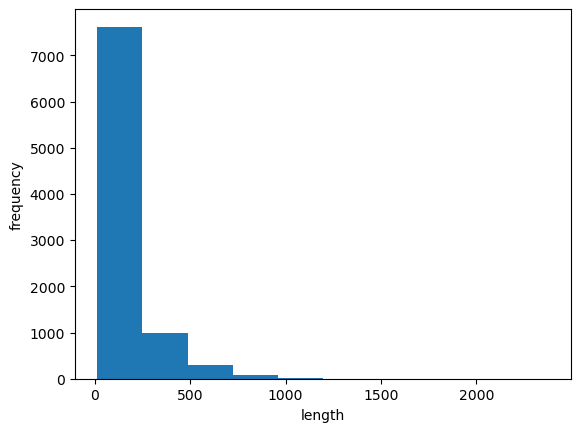

In [18]:
plt.figure()

plt.hist(lengths)

plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 4)

In [20]:
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)
test_seq = pad_sequences(x_test, maxlen = 100)

In [21]:
# train_seq 크기 확인
print(train_seq.shape)

(7185, 100)


In [22]:
print(train_seq[0])

[  4 141   2   5 789   2   2  10   2  96  92   4 547   2 108   2   2   2
 238  21 540 296 105   4 491  40   2   4 503  16   2   6   2  10 599   2
  96 117   4  54 804 177   6   2  16  34   2   4 176   8   4 599   2  96
  23 858 131  13   2   2  10   2 818  72  20   2  28  10 599 982  58   2
   2   2   9  10   2 899   5  83  82   4 599   2   5 358   2   2   2   2
   2   2 348   4 491   5 974   2  17  12]


In [23]:
print(x_train[0][-10:])

[2, 2, 348, 4, 491, 5, 974, 2, 17, 12]


In [24]:
# 패딩 확인
train_seq[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1, 103,  53, 196, 492, 243,  14, 746, 785,  39,  83, 892,
        35, 243,  14, 539,   2,  35, 864, 318, 957,  35, 243,  14,   2,
       965,  35, 374, 124,   2,  35, 243,  14, 544,   2,  35,  88,   2,
       272,  35,  14,   2, 965,  35, 123,   4,  49,   2,   4,  74, 302,
         2,   6,   4,   2,   2, 281,   4, 245, 260,  88, 138,  70,  47,
        20,   6,   2, 191,  35, 243,  22,  10,  29, 157, 184, 162, 487,
        72,  72,  20,   6,   2, 821,  35,  17,  12])

In [25]:
# 종속변수 종류 수 확인
len(np.unique(y_train))

46

# 모델 구성

### CNN + RNN

In [26]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 128, input_shape=(100,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(46, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,038 (800.93 KB)

 Trainable params: 205,038 (800.93 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련

In [28]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [29]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3668 - loss: 2.8158 - val_accuracy: 0.5064 - val_loss: 1.9640
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5244 - loss: 1.8471 - val_accuracy: 0.5849 - val_loss: 1.6806
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6075 - loss: 1.5744 - val_accuracy: 0.6450 - val_loss: 1.4756
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6619 - loss: 1.4000 - val_accuracy: 0.6483 - val_loss: 1.4390
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6713 - loss: 1.3170 - val_accuracy: 0.6617 - val_loss: 1.3527
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6819 - loss: 1.2471 - val_accuracy: 0.6700 - val_loss: 1.3500
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6973 - loss: 1.1636 - val_accuracy: 0.6761 - val_loss: 1.2881
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7171 - loss: 1.0977 - 

In [30]:
model.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 1.1519


[1.1739957332611084, 0.7235084772109985]

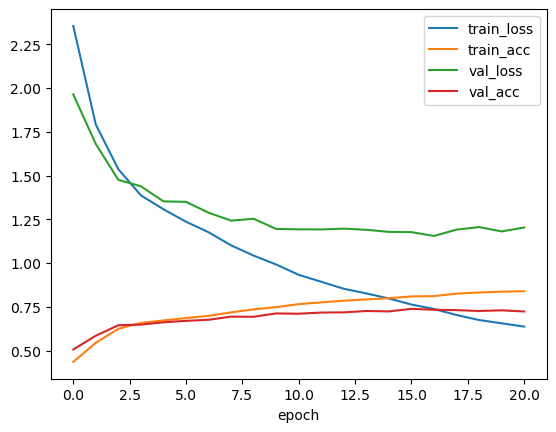

In [31]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

## Model2

In [32]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 5000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [34]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

In [35]:
# 종속변수 종류 수 확인
len(np.unique(y_train))

46

# 모델구성2

In [36]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(5000, 256, input_shape=(100,)))
model2.add(keras.layers.Dropout(0.4))
model2.add(keras.layers.Conv1D(128, 5, activation = "relu"))
model2.add(keras.layers.MaxPool1D(4))
model2.add(keras.layers.LSTM(100))
model2.add(keras.layers.Dense(46, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 256)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 96, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,540,214 (5.88 MB)

 Trainable params: 1,540,214 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련2

In [38]:
model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [39]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4084 - loss: 2.5379 - val_accuracy: 0.5960 - val_loss: 1.5573
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6341 - loss: 1.5251 - val_accuracy: 0.6861 - val_loss: 1.2903
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7113 - loss: 1.2091 - val_accuracy: 0.7134 - val_loss: 1.1346
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7522 - loss: 0.9913 - val_accuracy: 0.7373 - val_loss: 1.0182
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7749 - loss: 0.8842 - val_accuracy: 0.7535 - val_loss: 0.9987
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8205 - loss: 0.7199 - val_accuracy: 0.7529 - val_loss: 0.9831
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8458 - loss: 0.6417 - val_accuracy: 0.7663 - val_loss: 0.9431
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8676 - loss: 0.5318 - 

In [40]:
model2.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7578 - loss: 1.0487


[1.079426646232605, 0.7511131167411804]

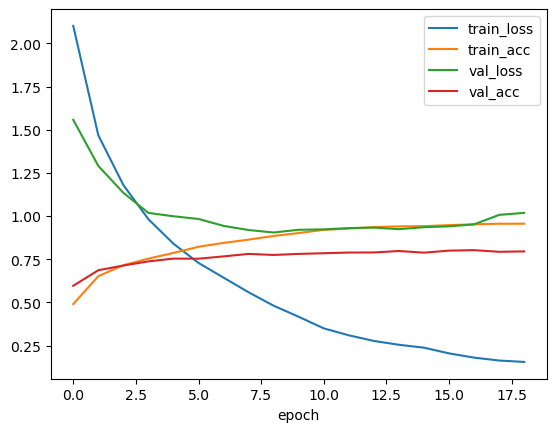

In [41]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model3

In [42]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [44]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

In [45]:
# 종속변수 종류 수 확인
len(np.unique(y_train))

46

# 모델구성3

In [46]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model3.add(keras.layers.LSTM(100, activation='tanh'))
model3.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,046 (722.84 KB)

 Trainable params: 185,046 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련3

In [48]:
model3.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-lstm-model.keras",
                                               save_best_only = True)

In [49]:
history = model3.fit(train_seq, y_train, epochs = 200, batch_size = 20,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4137 - loss: 2.4483 - val_accuracy: 0.5270 - val_loss: 1.8088
Epoch 2/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5427 - loss: 1.7867 - val_accuracy: 0.5643 - val_loss: 1.7383
Epoch 3/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5762 - loss: 1.6716 - val_accuracy: 0.6160 - val_loss: 1.5573
Epoch 4/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6108 - loss: 1.5517 - val_accuracy: 0.6600 - val_loss: 1.4096
Epoch 5/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6554 - loss: 1.3541 - val_accuracy: 0.6956 - val_loss: 1.2530
Epoch 6/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6941 - loss: 1.2019 - val_accuracy: 0.7140 - val_loss: 1.1817
Epoch 7/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7204 - loss: 1.0947 - val_accuracy: 0.7290 - val_loss: 1.1220
Epoch 8/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7329 - loss: 1.0189 - 

In [50]:
model3.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7702 - loss: 0.9962


[1.0415605306625366, 0.7653606534004211]

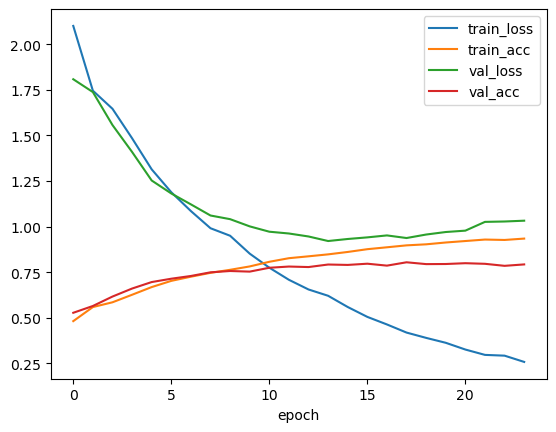

In [51]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model4

In [52]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 5000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [53]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [54]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

In [55]:
# 종속변수 종류 수 확인
len(np.unique(y_train))

46

# 모델구성4

In [56]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model4.add(keras.layers.Dropout(0.4))
model4.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.3))
model4.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model4.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-dropput-model.keras",
                                               save_best_only = True)

In [58]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 585,046 (2.23 MB)

 Trainable params: 585,046 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련4

In [59]:
history = model4.fit(train_seq, y_train, epochs = 200, batch_size = 20,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3877 - loss: 2.5247 - val_accuracy: 0.5103 - val_loss: 1.8950
Epoch 2/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5306 - loss: 1.8208 - val_accuracy: 0.5860 - val_loss: 1.6055
Epoch 3/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5661 - loss: 1.6408 - val_accuracy: 0.5921 - val_loss: 1.6892
Epoch 4/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5971 - loss: 1.5486 - val_accuracy: 0.6004 - val_loss: 1.5243
Epoch 5/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6404 - loss: 1.3930 - val_accuracy: 0.6611 - val_loss: 1.3334
Epoch 6/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6670 - loss: 1.2679 - val_accuracy: 0.6739 - val_loss: 1.3400
Epoch 7/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6981 - loss: 1.1620 - val_accuracy: 0.6772 - val_loss: 1.2983
Epoch 8/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7154 - loss: 1.1028 -

In [60]:
model4.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7417 - loss: 1.1834


[1.2341035604476929, 0.7319679260253906]

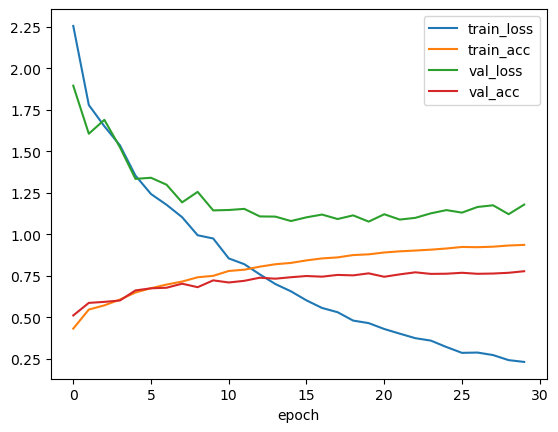

In [61]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model5

In [62]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [63]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 12)

In [64]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성5

In [65]:
model5 = keras.Sequential()
model5.add(keras.layers.Embedding(1000, 128, input_shape=(100,)))
model5.add(keras.layers.Dropout(0.4))

model5.add(keras.layers.Conv1D(32, 5, activation = "relu"))
model5.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Dropout(0.3))

model5.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model5.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Dropout(0.3))

model5.add(keras.layers.Conv1D(128, 5, activation = "relu"))
model5.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Dropout(0.3))

model5.add(keras.layers.LSTM(64))
model5.add(keras.layers.Dense(46, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 96, 32)              │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 48, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 44, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 18, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,302 (985.55 KB)

 Trainable params: 252,302 (985.55 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련5

In [67]:
model5.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [68]:
history = model5.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3473 - loss: 2.7149 - val_accuracy: 0.5147 - val_loss: 1.8451
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5310 - loss: 1.7908 - val_accuracy: 0.5487 - val_loss: 1.7366
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5933 - loss: 1.6075 - val_accuracy: 0.6199 - val_loss: 1.5148
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6718 - loss: 1.3517 - val_accuracy: 0.6611 - val_loss: 1.3783
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7058 - loss: 1.2251 - val_accuracy: 0.6856 - val_loss: 1.2891
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7164 - loss: 1.1443 - val_accuracy: 0.6973 - val_loss: 1.2638
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7315 - loss: 1.0643 - val_accuracy: 0.7045 - val_loss: 1.2236
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7450 - loss: 1.0116 - 

In [69]:
model5.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7245 - loss: 1.1559


[1.189287781715393, 0.7177203893661499]

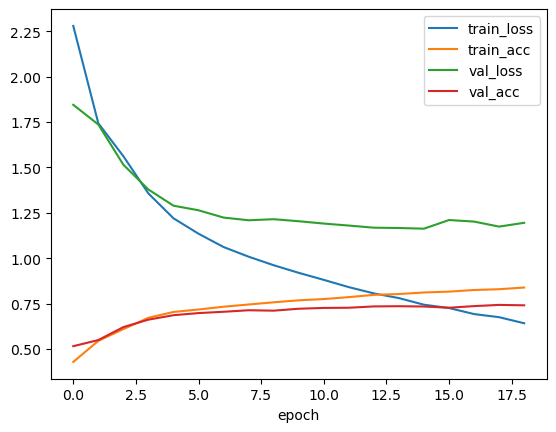

In [70]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model6

In [71]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [72]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [73]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성6

In [74]:
model6 = keras.Sequential()
model6.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model6.add(keras.layers.LSTM(200, activation='tanh', dropout = 0.3, return_sequences = True))
model6.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.3))
model6.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 200)            │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865,846 (3.30 MB)

 Trainable params: 865,846 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련6

In [76]:
model6.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-2rnn-model.keras",
                                               save_best_only = True)

In [77]:
history = model6.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.3433 - loss: 2.7501 - val_accuracy: 0.4085 - val_loss: 2.1816
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.4676 - loss: 2.1212 - val_accuracy: 0.4502 - val_loss: 1.9297
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.5055 - loss: 1.9392 - val_accuracy: 0.5609 - val_loss: 1.7782
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.5412 - loss: 1.7971 - val_accuracy: 0.5654 - val_loss: 1.6544
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.5804 - loss: 1.6430 - val_accuracy: 0.5960 - val_loss: 1.5406
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.6037 - loss: 1.5566 - val_accuracy: 0.6105 - val_loss: 1.5028
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.6075 - loss: 1.5329 - val_accuracy: 0.6105 - val_loss: 1.4502
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.6270 -

In [78]:
model6.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7194 - loss: 1.3129


[1.3391917943954468, 0.7137132883071899]

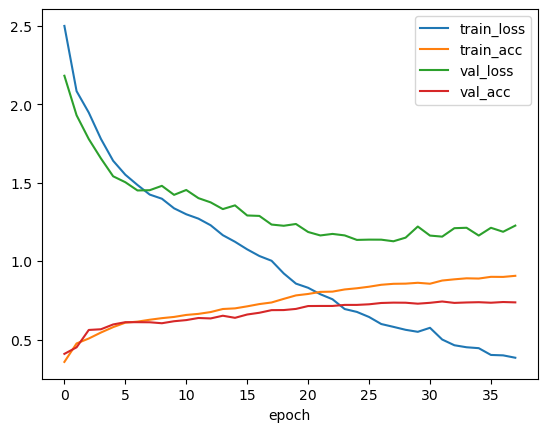

In [79]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model7

In [80]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [81]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [82]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성7

In [83]:
model7 = keras.Sequential()
model7.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model7.add(keras.layers.LSTM(200, activation='tanh', dropout = 0.3, return_sequences = True))
model7.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.3))
model7.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 200)            │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,846 (1.78 MB)

 Trainable params: 465,846 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련7

In [85]:
model7.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-2rnn-model.keras",
                                               save_best_only = True)

In [86]:
history = model7.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.3356 - loss: 2.6949 - val_accuracy: 0.5342 - val_loss: 1.7791
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.5155 - loss: 1.8340 - val_accuracy: 0.5042 - val_loss: 2.0967
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.5275 - loss: 1.8771 - val_accuracy: 0.5459 - val_loss: 1.6925
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.5692 - loss: 1.6866 - val_accuracy: 0.6066 - val_loss: 1.6036
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.6010 - loss: 1.5905 - val_accuracy: 0.6127 - val_loss: 1.5121
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.6156 - loss: 1.5131 - val_accuracy: 0.6077 - val_loss: 1.5696
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.6064 - loss: 1.5771 - val_accuracy: 0.6266 - val_loss: 1.4855
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.6092 -

113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.8834 - loss: 0.4600 - val_accuracy: 0.7696 - val_loss: 1.0026
Epoch 51/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.8871 - loss: 0.4412 - val_accuracy: 0.7702 - val_loss: 0.9686
Epoch 52/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.8855 - loss: 0.4311 - val_accuracy: 0.7646 - val_loss: 1.0238
Epoch 53/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.8822 - loss: 0.4486 - val_accuracy: 0.7713 - val_loss: 0.9958
Epoch 54/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.8985 - loss: 0.4033 - val_accuracy: 0.7757 - val_loss: 0.9814


In [87]:
model7.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7491 - loss: 1.0615


[1.0910919904708862, 0.7497773766517639]

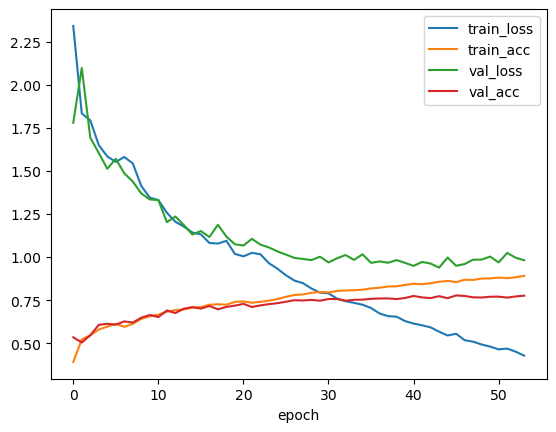

In [88]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model8

In [89]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [90]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [91]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성8

In [92]:
model8 = keras.Sequential()
model8.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model8.add(keras.layers.GRU(100, activation='tanh', dropout = 0.3))
model8.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,246 (645.49 KB)

 Trainable params: 165,246 (645.49 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련8

In [94]:
model8.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-gru-model.keras",
                                               save_best_only = True)

In [95]:
history = model8.fit(train_seq, y_train, epochs = 200, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3273 - loss: 2.8951 - val_accuracy: 0.4686 - val_loss: 1.9403
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.4864 - loss: 1.8781 - val_accuracy: 0.5743 - val_loss: 1.6274
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5666 - loss: 1.6931 - val_accuracy: 0.6010 - val_loss: 1.5569
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6112 - loss: 1.5414 - val_accuracy: 0.6166 - val_loss: 1.4933
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6298 - loss: 1.4919 - val_accuracy: 0.6433 - val_loss: 1.3803
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6502 - loss: 1.3952 - val_accuracy: 0.6628 - val_loss: 1.3003
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6741 - loss: 1.2863 - val_accuracy: 0.6978 - val_loss: 1.2023
Epoch 8/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7146 - loss: 1.1399 - 

In [96]:
model8.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7713 - loss: 1.0540


[1.0770395994186401, 0.7693677544593811]

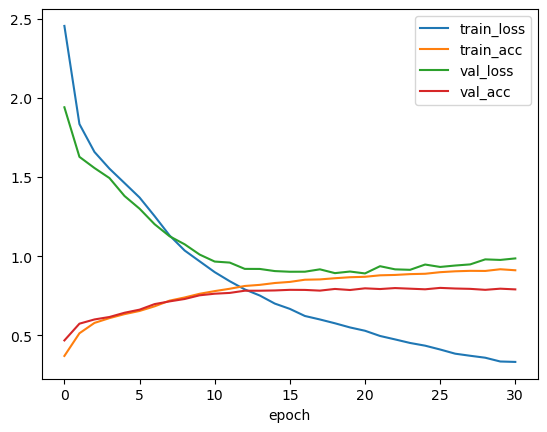

In [97]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model9

In [98]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [99]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [100]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성9

In [101]:
model9 = keras.Sequential()
model9.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model9.add(keras.layers.GRU(100, activation='relu'))
model9.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
model9.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,246 (645.49 KB)

 Trainable params: 165,246 (645.49 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련9

In [103]:
model9.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-gru-model.keras",
                                               save_best_only = True)

In [104]:
history = model9.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.3300 - loss: 3.1973 - val_accuracy: 0.3873 - val_loss: 2.1661
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4083 - loss: 2.0782 - val_accuracy: 0.5092 - val_loss: 1.7740
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5161 - loss: 1.7513 - val_accuracy: 0.5620 - val_loss: 1.6039
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5862 - loss: 1.6255 - val_accuracy: 0.6233 - val_loss: 1.4833
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6216 - loss: 1.5007 - val_accuracy: 0.6366 - val_loss: 1.3803
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6475 - loss: 1.3916 - val_accuracy: 0.6739 - val_loss: 1.2654
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6865 - loss: 1.2279 - val_accuracy: 0.6945 - val_loss: 1.1833
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7109 - loss: 1.0812 - 

In [105]:
model9.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7672 - loss: 1.0250


[1.0621932744979858, 0.7644701600074768]

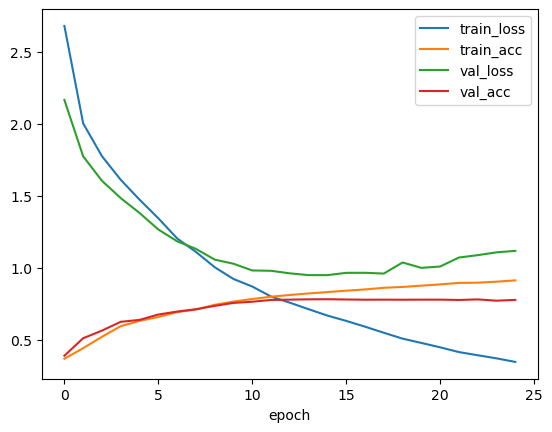

In [106]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model10

In [107]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [108]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [109]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성10

In [110]:
model10 = keras.Sequential()
model10.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model10.add(keras.layers.GRU(100, activation='tanh'))
model10.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
model10.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,246 (645.49 KB)

 Trainable params: 165,246 (645.49 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련10

In [112]:
model10.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-gru-model.keras",
                                               save_best_only = True)

In [113]:
history = model10.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.3378 - loss: 2.9223 - val_accuracy: 0.4496 - val_loss: 1.9540
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4753 - loss: 1.9206 - val_accuracy: 0.5587 - val_loss: 1.6302
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5897 - loss: 1.6246 - val_accuracy: 0.6004 - val_loss: 1.5048
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6196 - loss: 1.5210 - val_accuracy: 0.6355 - val_loss: 1.4255
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6583 - loss: 1.3564 - val_accuracy: 0.6594 - val_loss: 1.2959
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6855 - loss: 1.2476 - val_accuracy: 0.6906 - val_loss: 1.2320
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7236 - loss: 1.1064 - val_accuracy: 0.7095 - val_loss: 1.1207
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7477 - loss: 1.0049 - 

In [114]:
model10.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7573 - loss: 1.0662


[1.0898628234863281, 0.7524487972259521]

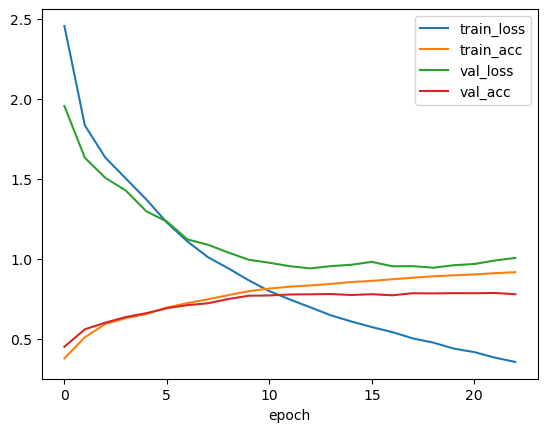

In [115]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model11

In [116]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [117]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [118]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성11

In [119]:
model11 = keras.Sequential()
model11.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model11.add(keras.layers.LSTM(100, activation='tanh'))
model11.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
model11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,046 (722.84 KB)

 Trainable params: 185,046 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련11

In [121]:
nadam = keras.optimizers.Nadam(learning_rate=0.001)
model11.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-gru-model.keras",
                                               save_best_only = True)

In [122]:
history = model11.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.3733 - loss: 2.6693 - val_accuracy: 0.4713 - val_loss: 1.9998
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4949 - loss: 1.9219 - val_accuracy: 0.5593 - val_loss: 1.6714
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5797 - loss: 1.6804 - val_accuracy: 0.5676 - val_loss: 1.6195
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5797 - loss: 1.6558 - val_accuracy: 0.5570 - val_loss: 1.6551
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5753 - loss: 1.6372 - val_accuracy: 0.6166 - val_loss: 1.5818
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6138 - loss: 1.5949 - val_accuracy: 0.6132 - val_loss: 1.4717
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6257 - loss: 1.4821 - val_accuracy: 0.6377 - val_loss: 1.3994
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6199 - loss: 1.5134 - 

In [123]:
model11.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7734 - loss: 1.0208


[1.0679787397384644, 0.7640249133110046]

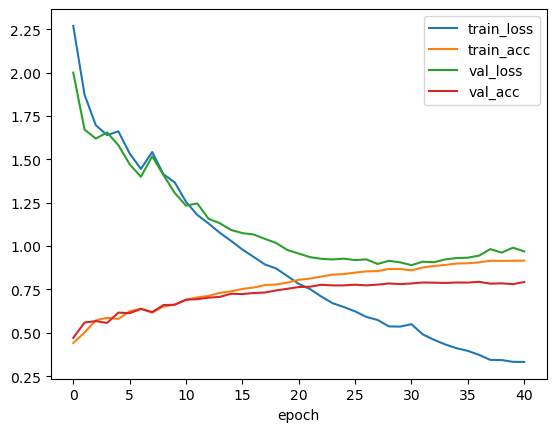

In [124]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model12

In [125]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [126]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [127]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성12

In [128]:
model12 = keras.Sequential()
model12.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model12.add(keras.layers.LSTM(200, activation='tanh', dropout = 0.3, return_sequences = True))
model12.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.3))
model12.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
model12.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 200)            │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,846 (1.78 MB)

 Trainable params: 465,846 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련12

In [130]:
nadam = keras.optimizers.Nadam()
model12.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-gru-model.keras",
                                               save_best_only = True)

In [131]:
history = model12.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.3383 - loss: 2.6888 - val_accuracy: 0.4786 - val_loss: 2.0335
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.4870 - loss: 2.0230 - val_accuracy: 0.5348 - val_loss: 1.7586
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.5384 - loss: 1.7973 - val_accuracy: 0.5487 - val_loss: 1.7279
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.5707 - loss: 1.6601 - val_accuracy: 0.6132 - val_loss: 1.4878
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.6147 - loss: 1.5311 - val_accuracy: 0.6249 - val_loss: 1.4432
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.6357 - loss: 1.4279 - val_accuracy: 0.6533 - val_loss: 1.3679
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.6554 - loss: 1.3781 - val_accuracy: 0.6667 - val_loss: 1.2953
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.6611 -

In [132]:
model12.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7713 - loss: 0.9819


[1.0126585960388184, 0.7644701600074768]

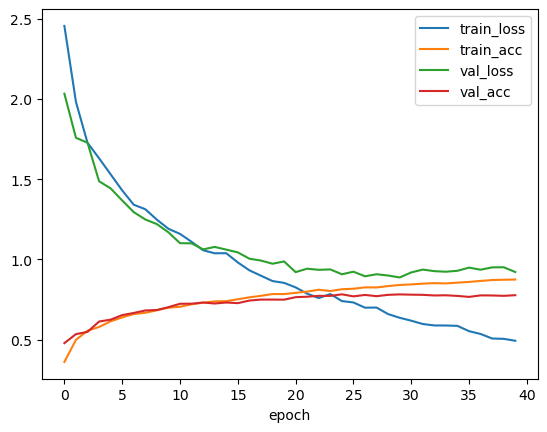

In [133]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model13

In [134]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 5000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [135]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [136]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성13

In [137]:
model13 = keras.Sequential()
model13.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model13.add(keras.layers.LSTM(64, activation='tanh'))
model13.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [138]:
model13.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,230 (2.08 MB)

 Trainable params: 545,230 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련13

In [139]:
nadam = keras.optimizers.Nadam()
model13.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-lstm-model.keras",
                                               save_best_only = True)

In [140]:
history = model13.fit(train_seq, y_train, epochs = 200, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3850 - loss: 2.7510 - val_accuracy: 0.5170 - val_loss: 1.7979
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5466 - loss: 1.7601 - val_accuracy: 0.5665 - val_loss: 1.5868
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5559 - loss: 1.6704 - val_accuracy: 0.6071 - val_loss: 1.5084
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5461 - loss: 1.6501 - val_accuracy: 0.5899 - val_loss: 1.5159
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5980 - loss: 1.5090 - val_accuracy: 0.5743 - val_loss: 1.5659
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6309 - loss: 1.4235 - val_accuracy: 0.6349 - val_loss: 1.3767
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6681 - loss: 1.2631 - val_accuracy: 0.6466 - val_loss: 1.3164
Epoch 8/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7024 - loss: 1.1254 - 

In [141]:
model13.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7117 - loss: 1.2820


[1.3271676301956177, 0.707034707069397]

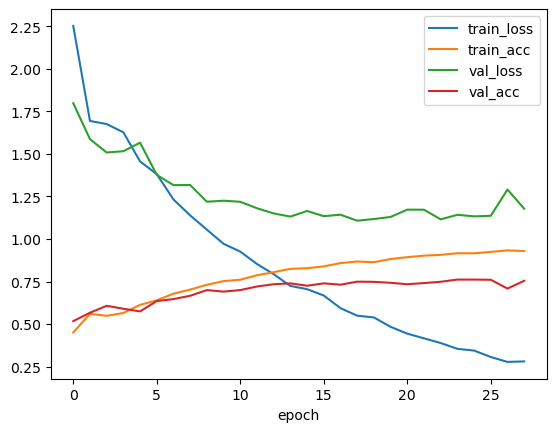

In [142]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model 14

In [143]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 5000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [144]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [145]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성14

In [146]:
model14 = keras.Sequential()
model14.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model14.add(keras.layers.LSTM(500, activation='tanh', dropout = 0.2, return_sequences = True))
model14.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.2))
model14.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [147]:
model14.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 500)            │       1,202,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100)                 │         240,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,947,046 (7.43 MB)

 Trainable params: 1,947,046 (7.43 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련14

In [148]:
nadam = keras.optimizers.Nadam()
model14.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-2rnn-model.keras",
                                               save_best_only = True)

In [149]:
history = model14.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 43s 361ms/step - accuracy: 0.3395 - loss: 2.6267 - val_accuracy: 0.3550 - val_loss: 2.3310
Epoch 2/100
 61/113 ━━━━━━━━━━━━━━━━━━━━ 19s 367ms/step - accuracy: 0.3935 - loss: 2.3254

KeyboardInterrupt: 

In [ ]:
model14.evaluate(test_seq, y_test)

# 모델15

In [150]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [151]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [152]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성15

In [153]:
model15 = keras.Sequential()
model15.add(keras.layers.Embedding(1000, 128, input_shape=(100,)))
model15.add(keras.layers.Dropout(0.5))
model15.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model15.add(keras.layers.MaxPool1D(4))
model15.add(keras.layers.LSTM(64))
model15.add(keras.layers.Dense(46, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [154]:
model15.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 100, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 96, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,038 (800.93 KB)

 Trainable params: 205,038 (800.93 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련15

In [155]:
model15.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [156]:
history = model15.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3722 - loss: 2.7581 - val_accuracy: 0.5337 - val_loss: 1.8605
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5301 - loss: 1.9009 - val_accuracy: 0.5760 - val_loss: 1.6256
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5881 - loss: 1.6564 - val_accuracy: 0.6394 - val_loss: 1.4549
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6553 - loss: 1.4699 - val_accuracy: 0.6717 - val_loss: 1.3011
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6881 - loss: 1.2905 - val_accuracy: 0.6934 - val_loss: 1.2039
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6995 - loss: 1.2147 - val_accuracy: 0.7201 - val_loss: 1.1212
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7302 - loss: 1.0799 - val_accuracy: 0.7129 - val_loss: 1.1189
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7468 - loss: 1.0222 - 

In [157]:
model15.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.9950


[1.0242235660552979, 0.7689225077629089]

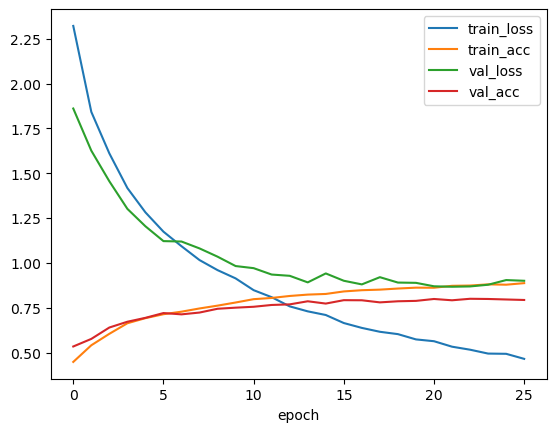

In [158]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델16

In [159]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [160]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [161]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델 구성16

In [162]:
model16 = keras.Sequential()
model16.add(keras.layers.Embedding(1000, 128, input_shape=(100,)))
model16.add(keras.layers.Dropout(0.5))
model16.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model16.add(keras.layers.MaxPool1D(4))
model16.add(keras.layers.LSTM(64))
model16.add(keras.layers.Dense(46, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [163]:
model16.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 100, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 96, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,038 (800.93 KB)

 Trainable params: 205,038 (800.93 KB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련16

In [164]:
nadam = keras.optimizers.Nadam()
model16.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [165]:
history = model16.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4082 - loss: 2.6375 - val_accuracy: 0.5609 - val_loss: 1.6585
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5839 - loss: 1.6668 - val_accuracy: 0.6311 - val_loss: 1.4608
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6478 - loss: 1.4256 - val_accuracy: 0.6589 - val_loss: 1.3113
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6737 - loss: 1.3146 - val_accuracy: 0.6895 - val_loss: 1.2192
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6997 - loss: 1.2044 - val_accuracy: 0.7151 - val_loss: 1.1327
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7508 - loss: 1.0477 - val_accuracy: 0.7245 - val_loss: 1.0836
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7684 - loss: 0.9610 - val_accuracy: 0.7468 - val_loss: 1.0297
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7767 - loss: 0.9141 - 

In [166]:
model16.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.9471


[0.9837706685066223, 0.7764915227890015]

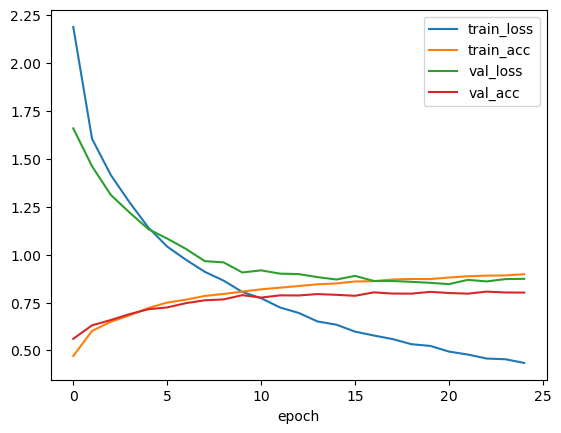

In [167]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model17

In [168]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [169]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [170]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성17

In [171]:
model17 = keras.Sequential()
model17.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model17.add(keras.layers.LSTM(200, activation='tanh', dropout = 0.3, return_sequences = True))
model17.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.3))
model17.add(keras.layers.Dense(46, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [172]:
model17.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 200)            │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,846 (1.78 MB)

 Trainable params: 465,846 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

# 모델훈련17

In [173]:
nadam = keras.optimizers.Nadam()
model17.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [174]:
history = model17.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.3278 - loss: 2.6798 - val_accuracy: 0.3990 - val_loss: 2.0827
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.4742 - loss: 2.0768 - val_accuracy: 0.5170 - val_loss: 1.8926
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.5072 - loss: 1.9429 - val_accuracy: 0.5270 - val_loss: 1.7490
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.5818 - loss: 1.6552 - val_accuracy: 0.5860 - val_loss: 1.5708
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.5911 - loss: 1.6082 - val_accuracy: 0.5982 - val_loss: 1.5300
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.5981 - loss: 1.5868 - val_accuracy: 0.5977 - val_loss: 1.5173
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.5964 - loss: 1.5948 - val_accuracy: 0.6160 - val_loss: 1.4681
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.6174 -

In [176]:
model17.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7373 - loss: 1.0717


[1.1046086549758911, 0.7324131727218628]

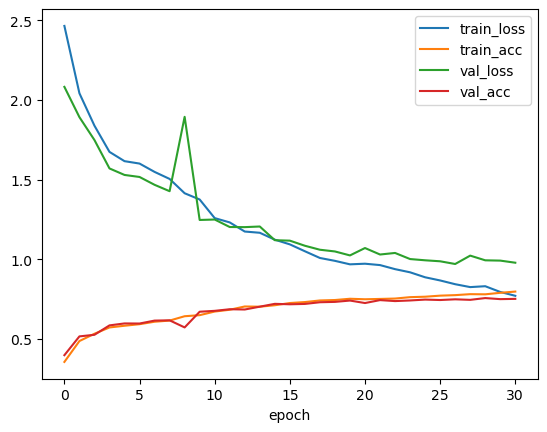

In [177]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model18

In [ ]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성 18

In [ ]:
model18 = keras.Sequential()
model18.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model18.add(keras.layers.LSTM(200, activation='tanh', dropout = 0.3, return_sequences = True))
model18.add(keras.layers.LSTM(100, activation='tanh', dropout = 0.3))
model18.add(keras.layers.Dense(46, activation='softmax'))

In [ ]:
model18.summary()

# 모델훈련18

In [ ]:
model18.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-2rnn-model.keras",
                                               save_best_only = True)

In [ ]:
history = model18.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
model18.evaluate(test_seq, y_test)

In [ ]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model19

In [ ]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구성19

In [ ]:
model19 = keras.Sequential()
model19.add(keras.layers.Embedding(5000, 128, input_shape=(100,)))
model19.add(keras.layers.Dropout(0.5))
model19.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model19.add(keras.layers.MaxPool1D(4))
model19.add(keras.layers.LSTM(64))
model19.add(keras.layers.Dense(46, activation = "softmax"))

In [ ]:
model19.summary()

# 모델훈련19

In [ ]:
nadam = keras.optimizers.Nadam()
model19.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [ ]:
history = model19.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
model19.evaluate(test_seq, y_test)

In [ ]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model20

In [ ]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델 구상20

In [ ]:
model20 = keras.Sequential()
model20.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model20.add(keras.layers.LSTM(100, activation='tanh'))
model20.add(keras.layers.Dense(46, activation='softmax'))

In [ ]:
model20.summary()

# 모델훈련 20

In [ ]:
nadam = keras.optimizers.Nadam()
model20.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-lstm-model.keras",
                                               save_best_only = True)

In [ ]:
history = model20.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
model20.evaluate(test_seq, y_test)

In [ ]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Model21

In [ ]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구상21

In [ ]:
model21 = keras.Sequential()
model21.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model21.add(keras.layers.LSTM(100, activation='tanh'))
model21.add(keras.layers.Dense(46, activation='softmax'))

In [ ]:
model21.summary()

# 모델훈련21

In [ ]:
model21.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-lstm-model.keras",
                                               save_best_only = True)

In [ ]:
history = model21.fit(train_seq, y_train, epochs = 200, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
model21.evaluate(test_seq, y_test)

# Model22

In [ ]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 1000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구상22

In [ ]:
model22 = keras.Sequential()
model22.add(keras.layers.Embedding(1000, 128, input_shape=(100,)))
model22.add(keras.layers.Dropout(0.5))
model22.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model22.add(keras.layers.MaxPool1D(4))
model22.add(keras.layers.LSTM(64))
model22.add(keras.layers.Dense(46, activation = "softmax"))

In [ ]:
model22.summary()

# 모델훈련22

In [ ]:
nadam = keras.optimizers.Nadam()
model22.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [ ]:
history = model22.fit(train_seq, y_train, epochs = 200, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
model22.evaluate(test_seq, y_test)

# Model23

In [ ]:
# 전체 데이터 셋에서 가장 자주 등장하는 단어 5000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 stratify = y_train, random_state = 11)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

# 모델구상23

In [ ]:
model23 = keras.Sequential()
model23.add(keras.layers.Embedding(5000, 128, input_shape=(100,)))
model23.add(keras.layers.Dropout(0.5))
model23.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model23.add(keras.layers.MaxPool1D(4))
model23.add(keras.layers.LSTM(64))
model23.add(keras.layers.Dense(46, activation = "softmax"))

In [ ]:
model23.summary()

# 모델훈련23

In [ ]:
nadam = keras.optimizers.Nadam()
model23.compile(optimizer = nadam, loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras",
                                               save_best_only = True)

In [ ]:
history = model23.fit(train_seq, y_train, epochs = 200, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
model23.evaluate(test_seq, y_test)

# 맛집 풀이

In [ ]:
# 카테고리당 100개로 선정
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
length = np.array([len(x) for x in x_train])

In [ ]:
# 길이 평균값과 중간값
print(np.mean(length), np.median(length), np.min(length), np.max(length))

## 데이터 전처리

In [ ]:
whole_list = [j for i in x_train for j in i]

In [ ]:
df = pd.DataFrame(whole_list)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df["count"] = 1

In [ ]:
df_count = df.groupby(0).sum().sort_values(by = "count", ascending = False)

In [ ]:
df_count

In [ ]:
df_count["word"] = pd.Series(df_count.index).map(lambda x: idx2word[x])

In [ ]:
df_count.head()

In [ ]:
remove_list = df_count[df_count["count"] >= len(x_train)/2]["word"].tolist()

In [ ]:
len(x_train)

In [ ]:
remove_list.remove("<S>")

In [ ]:
[word_index[i] for i in remove_list]

In [ ]:
for i in x_train:
    try:
        i.remove([word_index[i] for i in remove_list])
        i.remove(0)
        
    except:
        pass

## 데이터 분할 및 간단한 전처리

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 random_state = 7)

In [ ]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 100, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 100, truncating = "post")

In [ ]:
y_oh_train = keras.utils.to_categorical(y_train)
y_oh_val = keras.utils.to_categorical(y_val)
y_oh_test = keras.utils.to_categorical(y_test)

## 모델 구성

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 100, input_shape = (100,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(128, dropout = 0.5))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(46, activation = "softmax"))

In [ ]:
model.summary()

## 모델 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 5e-4)
model.compile(loss = "categorical_crossentropy", optimizer = rmsprop, metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 8, restore_best_weights = True)

In [ ]:
history = model.fit(train_seq, y_oh_train, batch_size = 32, epochs = 100,
                   validation_data = (val_seq, y_oh_val),
                   callbacks = [early_stopping_cb])

In [ ]:
model.evaluate(test_seq, y_oh_test)